In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
import matplotlib.font_manager as font_manager

In [1]:
#data = np.genfromtxt('LAI_Master_wo1006_new.csv', delimiter=",", skip_header=1, dtype=float)
#data = np.genfromtxt('N_master_without1006.csv', delimiter=",", skip_header=1, dtype=float)
data = np.genfromtxt('LNC_CC_Height_master.csv', delimiter=",", skip_header=1, dtype=float)
#data = np.genfromtxt('LAI_Lidar.csv', delimiter=",", skip_header=1, dtype=float)

#datb = pd.read_csv('LAI_Master_wo1006_new.csv', sep=',', dtype=float)
#datb = pd.read_csv('N_master_without1006.csv', sep=',', dtype=float)
datb = pd.read_csv('LNC_CC_Height_master.csv', sep=',', dtype=float)
#datb = pd.read_csv('LAI_Lidar.csv', sep=',', dtype=float)

#y_LAI = data[:,2].reshape(-1, 1)
#y_AGB = data[:,1].reshape(-1, 1)
#Y_Li = data[:,2].reshape(-1, 1)
#y_n = data[:,14]
#y_chm = data[:,1].reshape(-1, 1)
#Y = y_n

#LAI
#X = data[:, 5:17]
#X_veg = data[:,10:16]
#X_bands = data[:,5:11]
#Xh = data[:,[5,6,7,8,9,16]]
#h = data[:,16]
#X_new = data[:,[5,17]]

#N
#X = data[:,2:14]
X_bands = data[:,3:9]
#Xh = data[:,[2,3,4,5,6,13]]
#X_veg = data[:,7:13]
#Xvh = data[:,7:14]
#Xb = data[:,5:10]
#X_chm = data[:,7:14]

###LAI LIDAR
#X_bh = data[:,4:10]
#X = data[:,4:9]
#X_vh = data[:,9:16]
#h = data[:,9]
#print(Y)


###AGB
#X_bh = data[:,[6,7,8,9,10,11]]
#X = data[:,[6,7,8,9,10]]
#X_vh = data[:,9:16]
#h = data[:,9]
#print(Y)
datb


NameError: name 'np' is not defined

# Regression Models


In [3]:
import numpy as np
from sklearn import linear_model
from sklearn import gaussian_process
from sklearn import cross_decomposition
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_bands, Y, test_size=0.30, random_state=5)
y_train = np.ravel(y_train.T)
y_test = np.ravel(y_test.T)
#X_test = X_test.T
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)
#Y = np.ravel(Y.T)

In [14]:
scaler = StandardScaler()
scaler.fit(Xh)
Xh=scaler.transform(Xh)  
pca = PCA()
pcaResult = pca.fit_transform(Xh)
#print("PCA decomposition:")
#print(pca.components_)
print("Top-3 Most important components are:")
print(np.abs(pca.components_))
print("Explained_variance_ratio_:")
print(pca.explained_variance_ratio_)

Top-3 Most important components are:
[[0.4981912  0.5121921  0.29102831 0.47642561 0.04465614 0.41927528]
 [0.02041628 0.01313537 0.60570477 0.18529872 0.75455906 0.16981571]
 [0.26164644 0.23011286 0.30248958 0.44100565 0.29176586 0.71237347]
 [0.46009592 0.24424907 0.6047487  0.06748105 0.38149029 0.46135085]
 [0.67355448 0.3139391  0.30122733 0.34877214 0.40150653 0.27235857]
 [0.13253658 0.72547875 0.0215734  0.64653022 0.19177277 0.02951443]]
Explained_variance_ratio_:
[0.59228852 0.26490155 0.09533117 0.02475094 0.01694191 0.00578591]


In [18]:
def plotResult(residual, y_pred, string):
    fig, ax = plt.subplots()
    ymin = min(y_pred)
    ymax = max(y_pred)
    ax.scatter(y_pred, residual, alpha=0.7)
    ax.hlines(0, ymin, ymax, alpha=0.7, color='orange')
    ax.set_xlabel('LAI')
    ax.set_ylabel('Residual')
    fig.show()
    fig.savefig(string, dpi=300)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(Xh, Y, test_size=0.25, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X_veg_clusters, Y, test_size=0.25, random_state=7)
#X_train = X_train.T
y_train = np.ravel(y_train.T)
y_test = np.ravel(y_test.T)
#X_test = X_test.T
#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)
Y = np.ravel(Y.T)

In [8]:
#List of classifiers
classifiers = [
    make_pipeline(StandardScaler(), svm.SVR(kernel='linear')),
    make_pipeline(StandardScaler(), linear_model.SGDRegressor(max_iter=1000, tol=1e-3)),
    make_pipeline(StandardScaler(), linear_model.BayesianRidge()), 
    make_pipeline(StandardScaler(), cross_decomposition.PLSRegression(n_components=1)),
    make_pipeline(StandardScaler(), linear_model.LinearRegression()),
    make_pipeline(StandardScaler(), RandomForestRegressor())]

In [26]:
#Iterate through list of classifiers
x=0
for item in classifiers:
    print(item)
    x = x+1
    clf = item
    string = 'LAI' + str(x)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    residual = y_test-y_pred
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Train r2 = ', clf.score(X_train, y_train),'\n')
    print('Test r2 = ', clf.score(X_test, y_test),'\n')
    

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(kernel='linear'))])
RMSE: 5.633411487311107
Train r2 =  0.25546122761692347 

Test r2 =  0.24475666384177197 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])
RMSE: 4.809037812021763
Train r2 =  0.3921010592114955 

Test r2 =  0.4496229253342441 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('bayesianridge', BayesianRidge())])
RMSE: 5.53628457139953
Train r2 =  0.19383483217462183 

Test r2 =  0.27057480115382004 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('theilsenregressor',
                 TheilSenRegressor(max_subpopulation=10000))])
RMSE: 10.431839565987726
Train r2 =  -0.1134442384695058 

Test r2 =  -1.5897971616017852 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])
RMSE: 4.132816277473785
Train r2 =  0.40700599016386285 

In [23]:
#Grid search parameter dictionaries
SVRparam = {'C': [1, 10, 100, 1000, 0.1, 0.01, 0.001, 0.0001], 'epsilon':[1.0, 0.1, 0.01, 0.001, 10], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']}
SGDparam = {'loss': ['squared_loss', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'], 'alpha': [0.1, 0.01, 0.001, 0.0001, 0.00001], 'max_iter': [10, 100, 1000, 10000], 'epsilon': [1, 0.1, 0.001, 0.0001,0.00001], 'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']}
BRparam = {'n_iter': [100, 200, 300, 400, 500], 'tol': [0.1, 0.01, 0.001, 0.0001, 0.00001], 'alpha_1': [1e-03, 1e-04, 1e-06, 1e-07, 1e-08], 'alpha_2': [1e-03, 1e-04, 1e-06, 1e-07, 1e-08], 'lambda_1': [1e-03, 1e-04, 1e-06, 1e-07, 1e-08], 'lambda_2': [1e-03, 1e-04, 1e-06, 1e-07, 1e-08]}
PLSparam = {'n_components': [1, 2, 3, 4, 5], 'scale': [True, False], 'max_iter': [100, 200, 300, 400, 500, 600, 700, 800, 900]}
RFparam = {'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [1.0, 2.0, 3.0, 4.0], 'max_features': ['auto', 'sqrt', 'log2'], 'bootstrap': ['True', 'False'], 'oob_score': ['True', 'False']}

In [24]:

GSRegressors = [make_pipeline(StandardScaler(), GridSearchCV(SVR(), SVRparam, cv=5, n_jobs = -1, verbose=0, refit=True)),
                make_pipeline(StandardScaler(), GridSearchCV(linear_model.SGDRegressor(), SGDparam, cv=5, n_jobs = -1, verbose=0, refit=True)),
                make_pipeline(StandardScaler(), GridSearchCV(linear_model.BayesianRidge(), BRparam, cv=5, n_jobs = -1, verbose=0, refit=True)),
                make_pipeline(StandardScaler(), GridSearchCV(cross_decomposition.PLSRegression(), PLSparam, cv=5, n_jobs = -1, verbose=0, refit=True)),
                make_pipeline(StandardScaler(), GridSearchCV(RandomForestRegressor(), RFparam, cv=5, n_jobs = -1, verbose=0, refit=True))]

RMSE: 1.2587056410473614
Train r2 =  0.8793667687161644 

Test r2 =  0.8455541457051681 



<ipython-input-18-85455277782a>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


RMSE: 1.8216409665742481
Train r2 =  0.7518927625383343 

Test r2 =  0.6765155065579649 



<ipython-input-18-85455277782a>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


RMSE: 1.802547998316205
Train r2 =  0.7785304096718428 

Test r2 =  0.6832609760493726 



<ipython-input-18-85455277782a>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


RMSE: 2.555442171589809
Train r2 =  0.6624152196132651 

Test r2 =  0.3634097052339227 



<ipython-input-18-85455277782a>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\renea\anaconda3\envs\new_env\lib\site-packages\sklearn\ensemble\_forest.py:832: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
<ipython-input-18-85455277782a>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


RMSE: 3.2176052656419087
Train r2 =  -0.010476591750102404 

Test r2 =  -0.009237609245394296 



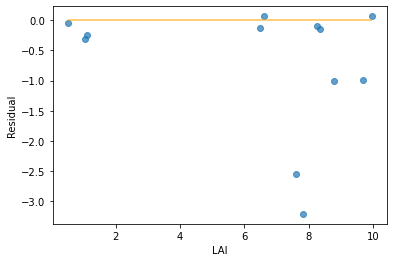

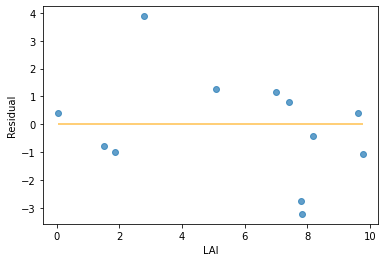

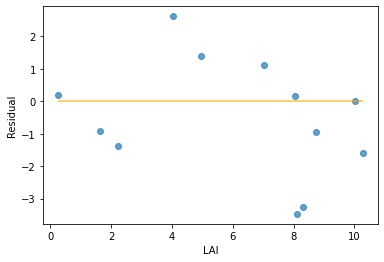

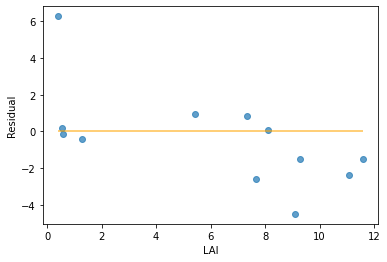

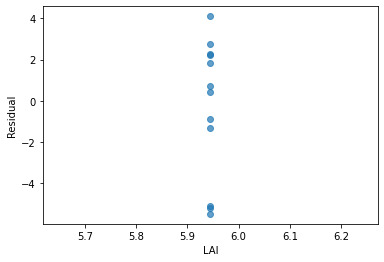

In [27]:
#Iterate through regressors with gridsearch
y=0
for item in GSRegressors:
    y = y+1
    string = 'LAI_GS' + str(y)
    clf = item
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    residual = y_test-y_pred
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('Train r2 = ', clf.score(X_train, y_train),'\n')
    print('Test r2 = ', clf.score(X_test, y_test),'\n')
    plotResult(residual, y_pred, string)

# Plotting

Training r2 =  0.8676163774160596 

Testing r2 =  0.4360631100880651 

[0.0567219  0.33674307 0.09044603 0.06012576 0.12537321 0.33059004]


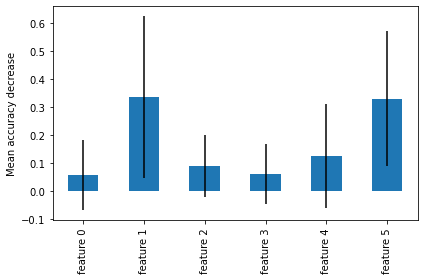

In [56]:
#plotting RF feature importance

clf = RandomForestRegressor()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Training r2 = ', clf.score(X_train, y_train),'\n')
print('Testing r2 = ', clf.score(X_test, y_test),'\n')
feature_names = [f'feature {i}' for i in range(Xh.shape[1])]
importances = clf.feature_importances_
print(importances)
std = np.std([
    tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
fig.savefig('LNC_RF_import.png', dpi=300)

In [54]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    clf, X_test, y_test, n_repeats=20, random_state=42, n_jobs=2)
forest_importances = pd.Series(result.importances_mean, index=feature_names)

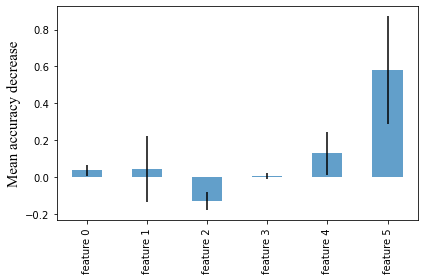

In [55]:
#plotting RF permutation index
fig, ax = plt.subplots()
axisFont = font_manager.FontProperties(family='Times New Roman',
                                   style='normal', size=15)
forest_importances.plot.bar(yerr=result.importances_std, ax=ax, alpha=0.7)

ax.set_ylabel("Mean accuracy decrease", fontproperties=axisFont)
fig.tight_layout()
fig.savefig('RF_permLAI.png', dpi=350)
plt.show()